In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import kagglehub

path = kagglehub.dataset_download("yasserhessein/multiclass-diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/multiclass-diabetes-dataset


In [ ]:
import os
csv_file = None
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            csv_file = str(os.path.join(root, file))

In [ ]:
df = pd.read_csv(csv_file)
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,0,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,1,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
3,0,45,2.3,24,4.0,2.9,1.0,1.0,1.5,0.4,21.0,0
4,0,50,2.0,50,4.0,3.6,1.3,0.9,2.1,0.6,24.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  264 non-null    int64  
 1   AGE     264 non-null    int64  
 2   Urea    264 non-null    float64
 3   Cr      264 non-null    int64  
 4   HbA1c   264 non-null    float64
 5   Chol    264 non-null    float64
 6   TG      264 non-null    float64
 7   HDL     264 non-null    float64
 8   LDL     264 non-null    float64
 9   VLDL    264 non-null    float64
 10  BMI     264 non-null    float64
 11  Class   264 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 24.9 KB


In [ ]:
df.shape

(264, 12)

In [ ]:
df.describe()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,0.545455,49.522727,5.671515,85.806818,6.862727,4.594394,2.151894,1.182879,2.530871,1.479167,26.626856,1.121212
std,0.498875,10.127301,4.002837,99.400047,2.544604,1.289062,1.265841,0.455591,1.000173,3.099856,5.093652,0.914857
min,0.000000,25.000000,1.100000,6.000000,0.900000,0.000000,0.600000,0.400000,0.300000,0.200000,19.000000,0.000000
25%,0.000000,43.000000,3.600000,46.000000,5.000000,3.875000,1.300000,0.900000,1.800000,0.675000,23.000000,0.000000
50%,1.000000,50.000000,4.700000,61.000000,6.100000,4.500000,1.800000,1.100000,2.500000,0.900000,25.000000,1.000000
75%,1.000000,55.250000,6.100000,82.250000,8.200000,5.300000,2.725000,1.325000,3.200000,1.300000,30.000000,2.000000
max,1.000000,77.000000,26.400000,800.000000,14.600000,9.500000,8.700000,4.000000,5.600000,31.800000,43.250000,2.000000


In [ ]:
df.isna().sum()

,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0
LDL,0
VLDL,0


In [ ]:
df["Class"].value_counts()

,count
Class,
2,128
0,96
1,40


In [ ]:
df_class_0 = df[df["Class"] == 0]
df_class_1 = df[df["Class"] == 1]
df_class_2 = df[df["Class"] == 2]

min_size = min(len(df_class_0), len(df_class_1), len(df_class_2))

df_class_0_down = df_class_0.sample(min_size, random_state=42)
df_class_1_down = df_class_1.sample(min_size, random_state=42)
df_class_2_down = df_class_2.sample(min_size, random_state=42)

df_balanced = pd.concat([df_class_0_down, df_class_1_down, df_class_2_down])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced["Class"].value_counts()

,count
Class,
1,40
0,40
2,40


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X = df_balanced.drop("Class", axis=1)
y = df_balanced["Class"]
X_scaled = MinMaxScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [116]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation="softmax")
])
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.3063 - loss: 1.0837 - val_accuracy: 0.4000 - val_loss: 1.0396
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3390 - loss: 1.0793 - val_accuracy: 0.5000 - val_loss: 1.0267
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.3561 - loss: 1.0738 - val_accuracy: 0.6000 - val_loss: 1.0188
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4373 - loss: 1.0379 - val_accuracy: 0.6500 - val_loss: 1.0135
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6924 - loss: 0.9852 - val_accuracy: 0.6500 - val_loss: 1.0077
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5683 - loss: 1.0026 - val_accuracy: 0.5500 - val_loss: 1.0036
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6178 - loss: 0.9530 - val_accuracy: 0.5000 - val_loss: 0.9922
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5510 - loss: 0.9682 - val_accuracy: 0.5500 - val_loss

In [117]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9583 - loss: 0.3099


[0.30987754464149475, 0.9583333134651184]

In [118]:
model.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_129 (Dense)               │ (None, 128)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 35,915 (140.30 KB)

 Trainable params: 11,971 (46.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 23,944 (93.54 KB)

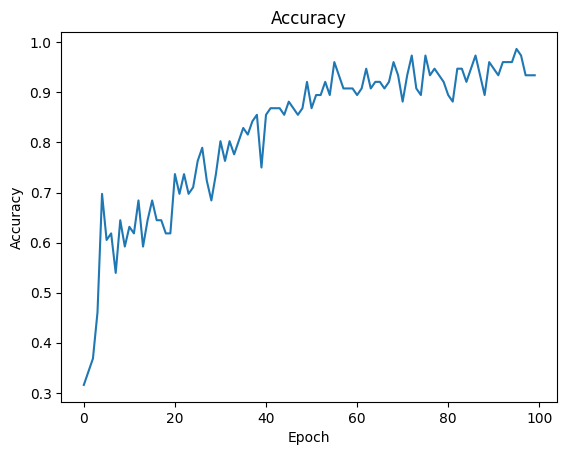

In [119]:
plt.plot(history.history["accuracy"])
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

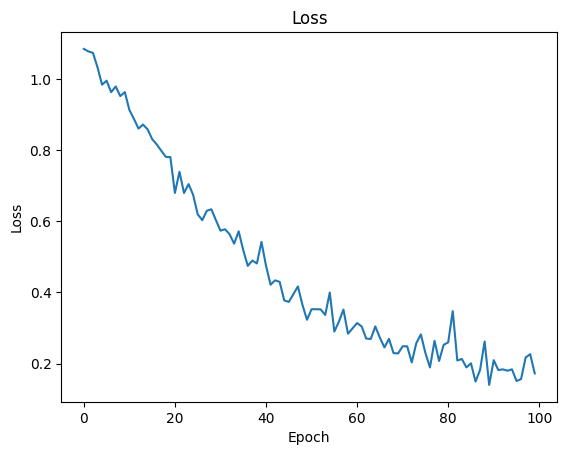

In [120]:
plt.plot(history.history["loss"])
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [121]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_pred[:5],y_test[:5]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


(array([2, 2, 0, 2, 0]),
 44    2
 47    2
 4     0
 55    2
 26    0
 Name: Class, dtype: int64)

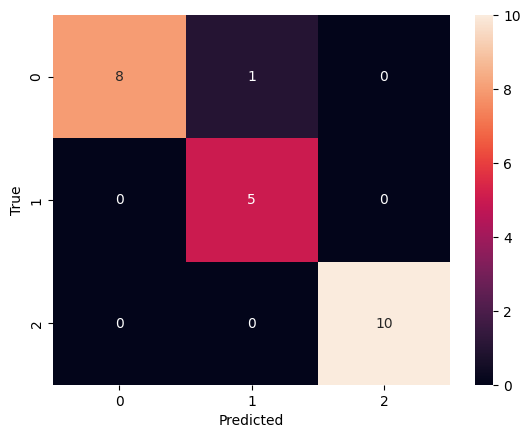

In [122]:
sns.heatmap(tf.math.confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [123]:
model.save("diabetes_model.keras")